In [43]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, acf

In [13]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("../data/ETTh1.csv", sep=",")
data["time_idx"] = [x for x in range(data.shape[0])]
data.head()

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT,time_idx
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,0
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,1
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001,2
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001,3
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000,4


<AxesSubplot:xlabel='time_idx', ylabel='OT'>

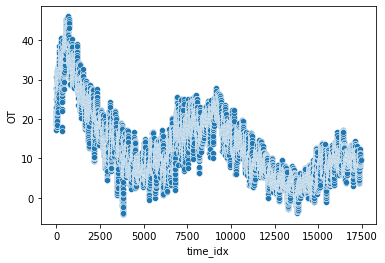

In [5]:
sns.scatterplot(data=data, x="time_idx", y="OT")

In [29]:
result = adfuller(data.OT)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.487964
p-value: 0.008302


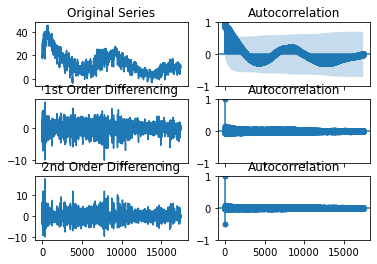

In [15]:
# make stationary

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(data.OT)
axes[0, 0].set_title('Original Series')
plot_acf(data.OT, ax=axes[0, 1], lags = np.arange(len(data)))

# 1st Differencing
axes[1, 0].plot(data.OT.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(data.OT.diff().dropna(), ax=axes[1, 1], lags = np.arange(len(data)-1))

# 2nd Differencing
axes[2, 0].plot(data.OT.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data.OT.diff().diff().dropna(), ax=axes[2, 1], lags = np.arange(len(data)-2))

plt.show()

In [45]:
order = (12, 0, 12) # AR, I (stationary), MA
model = ARIMA(data.OT[:10452], order=order)

In [41]:
model_fit = model.fit()
print(model_fit.summary())

C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                     OT   No. Observations:                10452
Model:               ARIMA(12, 0, 12)   Log Likelihood              -15265.955
Date:                Thu, 23 Dec 2021   AIC                          30583.910
Time:                        11:29:24   BIC                          30772.529
Sample:                             0   HQIC                         30647.616
                              - 10452                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2973      1.938      8.926      0.000      13.499      21.095
ar.L1         -0.4599      0.442     -1.041      0.298      -1.325       0.406
ar.L2         -0.2502      0.429     -0.583      0.5

In [74]:
train = data.OT[:10452]
validation = data.OT[10452:13936]
test = data.OT[13936:]

In [84]:
order = (4, 0, 4)
model = ARIMA(train, order=order)  
fitted = model.fit()
fitted.summary()

C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dmoho\anaconda3\envs\suTSF\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     OT   No. Observations:                10452
Model:                 ARIMA(4, 0, 4)   Log Likelihood              -15334.929
Date:                Thu, 23 Dec 2021   AIC                          30689.859
Time:                        11:57:59   BIC                          30762.404
Sample:                             0   HQIC                         30714.361
                              - 10452                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3292      1.333     13.004      0.000      14.717      19.941
ar.L1         -0.2385      2.725     -0.088      0.930      -5.580       5.103
ar.L2         -0.0051      1.622     -0.003      0.997      -3.185       3.174
ar.L3          0.4680      1.362      0.344      0.731      -2.201       3.137
ar.L4          0.7431      2.417      0.307      0.758      -3.993       5.479
ma.L1          1.2226      2.725      0.449      0.654      -4.119       6.564
ma.L2          1.2258      1.063      1.153      0.249      -0.858       3.310
ma.L3          0.7674      2.454      0.313      0.755      -4.043       5.578
ma.L4          0.0104      0.040      0.260      0.795      -0.068       0.089
sigma2         1.1007      0.008    137.681      0.000       1.085       1.116
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             16063.30
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
fc = fitted.forecast(validation.shape[0], alpha=0.05)  # 95% conf

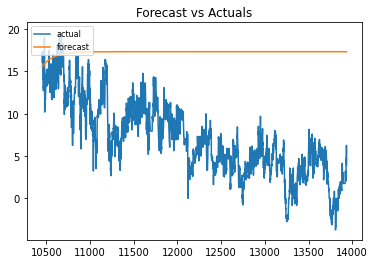

In [86]:
#plt.plot(train, label='training')
plt.plot(validation, label='actual')
plt.plot(fc, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()